# Unit Testing 

Isolation - should only test the unit of code they target, the function or method that's being tested.

Normally done in a test environment.

Given a known input, does the output of the code match our expectations?

In [11]:
from rearrange import rearrange_name

In [12]:
rearrange_name("Lovelace, Ada")

'Ada Lovelace'

Run tests by running rearrange.py first, then rearrange_test.py.

## Unit Test Cheat-Sheet
Frankly, the unit testing library for Python is fairly well documented, but it can be a bit of a dry read. Instead, we suggest covering the core module concepts, and then reading in more detail later.

### Best of Unit Testing Standard Library Module
Understand a Basic Example:

* https://docs.python.org/3/library/unittest.html#basic-example

Understand how to run the tests using the Command Line:

* https://docs.python.org/3/library/unittest.html#command-line-interface

Understand various Unit Test Design Patterns:

* https://docs.python.org/3/library/unittest.html#organizing-test-code

* Understand the uses of setUp, tearDown; setUpModule and tearDownModule

Understand basic assertions:

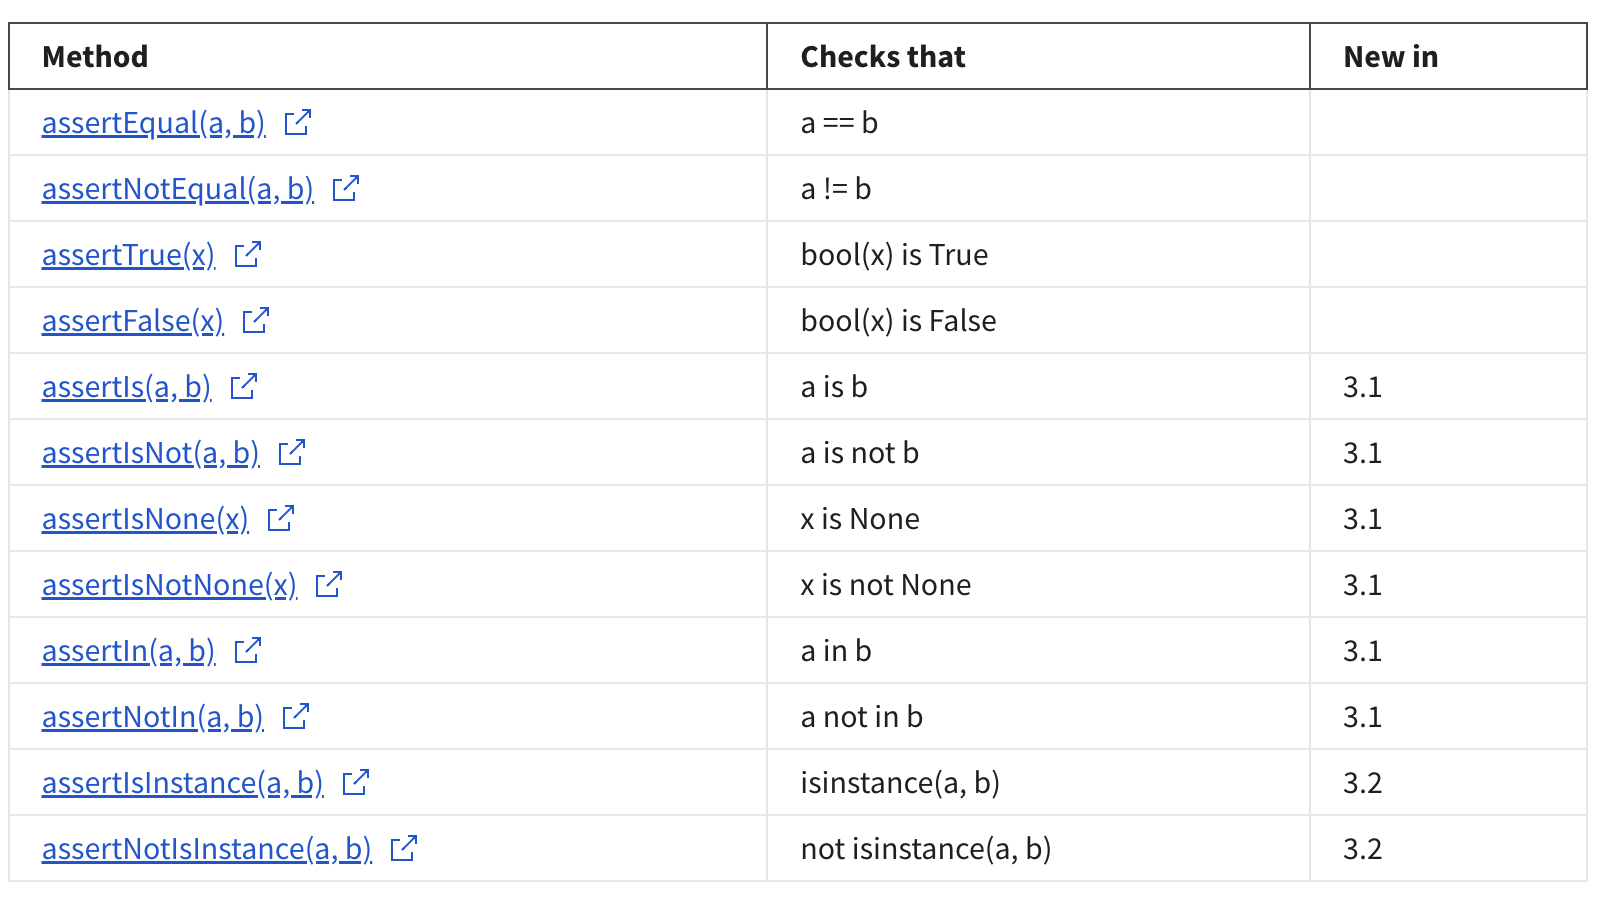

Understand more specific assertions such as assertRaises

* https://docs.python.org/3/library/unittest.html#unittest.TestCase.assertRaises

---

# Practice Notebook - Unit Tests and Edge Cases

In [13]:
import re 
  
my_txt = "An investment in knowledge pays the best interest."

def LetterCompiler(txt):
    result = re.findall(r'([a-c]).', txt)
    return result

print(LetterCompiler(my_txt))

['a', 'b']


In [14]:
import unittest

class TestCompiler(unittest.TestCase):

    def test_basic(self):
        testcase = "The best preparation for tomorrow is doing your best today."
        expected = ['b', 'a', 'a', 'b', 'a']
        self.assertEqual(LetterCompiler(testcase), expected)

In [15]:
unittest.main()

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/don/Library/Jupyter/runtime/kernel-v2-2006QWysl2rGlE46.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

Yikes! **<font color=red>SystemExit:</font> True** means an error occurred, as expected.  The reason is that `unittest.main( )` looks at *sys.argv*.  In Jupyter, by default, the first parameter of *sys.argv* is what started the Jupyter kernel which is not the case when executing it from the command line.  This default parameter is passed into `unittest.main( )` as an attribute when you don't explicitly pass it attributes and is therefore what causes the error about the kernel connection file not being a valid attribute. Passing an explicit list to `unittest.main( )` prevents it from looking at *sys.argv*. 
<br><br>Let's pass it the list ['first-arg-is-ignored'] for example.  In addition, we will pass it the parameter *exit = False* to prevent `unittest.main( )` from shutting down the kernel process.  Run the following cell with the *argv* and *exit* parameters passed into `unittest.main( )` to rerun your automatic test.

In [ ]:
unittest.main(argv = ['first-arg-is-ignored'], exit = False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [ ]:
class TestCompiler2(unittest.TestCase):
    
    def test_two(self):
        testcase = "A b c d e f g h i j k l m n o q r s t u v w x y z"
        expected = ['b', 'c']
        self.assertEqual(LetterCompiler(testcase), expected)

# EDGE CASES HERE

    def test_space(self):
        testcase = "abcdefghijklmnoqrstuwxyz"
        expected = ['a']
        self.assertEqual(LetterCompiler(testcase),expected)

unittest.main(argv = ['first-arg-is-ignored'], exit = False)

.F.
FAIL: test_space (__main__.TestCompiler2.test_space)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/gq/md5_6_vx0bv3r4qgpzdj1c3w0000gn/T/ipykernel_16988/723846269.py", line 13, in test_space
    self.assertEqual(LetterCompiler(testcase),expected)
AssertionError: Lists differ: ['a', 'c'] != ['a']

First list contains 1 additional elements.
First extra element 1:
'c'

- ['a', 'c']
+ ['a']

----------------------------------------------------------------------
Ran 3 tests in 0.002s

FAILED (failures=1)


### Solution

to solve for spaces, the pattern could be changed to: `r'[abc](?=[a-zA-Z ])'`

### White-box testing

Relies ton test creator's knowledge. Takes advantage of this fact. Alongside or after code is made.

### Black-box testing

Written with an awareness of what the program is supposed to do - its requirements or specification - but not how it does it.  

Less biased by code.

**Example:**

* typing www.google.de in browser returns google germany. we might not know how google processes the request but we know what the end result should be.





### Online catalog of products:
Blackbox test - verifies details of product are displayed
Whitebox test - functions by page -- checking prices are displayed correctly, etc.

## Other Test Types

#### Integration test 

verify that the interactions between the different pieces of code in integrated environments are working the way we expect them to.

make sure all pieces come together as expected.

#### Regression test 

usually written as part of a debugging and troubleshooting process to verify that an issue or error has been fixed once it's been identified.

ensures same mistake does not happen twice.

#### Smoke test

Smoke test sometimes called build verification test, get their name from a concept that comes from testing hardware equipment. Plug in the given piece of hardware and see if smoke starts coming out of it. When writing software smoke test serve as a kind of sanity check to find major bugs in a program. Smoke test answer basic questions like, does the program run? These tests are usually run before more refined testing takes place. Since if the software fails the smoke test you can be pretty sure none of the other tests will pass either.

For a web service the smoke test would be to check if there's a service running on the corresponding port. For an automation script, the smoke test would be to run it manually with some basic input and check that the script finishes successfully.


#### Load tests

These tests verify that the system behaves well when it's under significant load. To actually perform these tests will need to generate traffic to our application simulating typical usage of the service. These tests can be super-helpful when deploying new versions of our applications to verify that performance does not degrade. For example, we might want to measure the response time of our website while there are 100 requests per second on our pages, or a 1000, or 10,000. The actual numbers will depend on the expectations of how much traffic our website will receive.

Test Suite : Combining different types of tests.

## Test-driven Development

You might expect that most testing happens after the code has been written. This seems like a natural progression. First you write your script then you write tests that verify that the script does what you want it to do. 

But this isn't always the best approach. 

A process called **test-driven development** or TDD calls for creating the test before writing the code. 

This might seem a bit counter-intuitive, but it can make for more thoughtful well-written programs. When presented with a new problem that can be solved by automation, your gut instinct might be to fire up your code editor and start writing. But creating some tests first make sure that you've thought about the problem that you're trying to solve and some different approaches that you might use to accomplish it. 

Writing a test first also helps you think about the ways your program could fail and break which can lead to some valuable insights and even change the approach you take for the better. 

The **test-driven development cycle** typically involves first writing a test then running it to make sure it fails. After all, you haven't written the code to make it passed yet. Once you've verified it fails, you write the code that will satisfy the test then run the tests again. 

If it passes you can continue on to the next part of your program. If it fails you Debug and run the test again. The cycle is repeated for each new feature of your script until it's up and running. 

So before you write your next Python program, you might want to think about the tests you can create to make sure it's working as you expect. 

There are all resources out there if you'd like to learn more about how you can create code using the test-driven development approach. 

Lots of them are Python-centric, but the principles can be applied to any language you need to create in. Hopefully you can see the benefits of writing tests to validate the code rate. You gain some understanding about a different testing techniques available. 

Remember that good tests help make any automation and script you write more robust, resilient, and less buggy. Having reliable automation makes life better for everyone. 

Many companies take testing a step further and combine it with our version control systems and development processes.

 When engineers submit their code, it's integrated into the main repository and tests are automatically run against it to spot bugs and errors in a process called `Continuous Integration`.  
 
 Although useful, setting up a continuous integration process can be a big undertaking. Will talk more about it in a later course. In the meantime, if you use unit tests to validate the code you write, you're already on your way to a more reliable and robust automation. Up next, a reading summing up all the different types of tests we mentioned followed by a quick quiz to make sure you're on track.

### More about tests

Check out the following links for more information:

https://landing.google.com/sre/sre-book/chapters/monitoring-distributed-systems/

https://landing.google.com/sre/sre-book/chapters/testing-reliability/

https://testing.googleblog.com/2007/10/performance-testing.html

https://www.guru99.com/smoke-testing.html

https://www.guru99.com/exploratory-testing.html

https://testing.googleblog.com/2008/09/test-first-is-fun_08.html

## Try Except Construct

 the code in the except block is only executed if one of the instructions in the try block raise an error of the matching type

 

## Raising Errors


In [ ]:
def validate_user(username,minlen):
    if minlen < 1:
        raise ValueError("minlen must be at least 1")
    if len(username) < minlen:
        return False
    if not username.isalnum():
        return False
    return True

In [ ]:
validate_user("",0)

ValueError: minlen must be at least 1

In [ ]:
print(validate_user("",1))
print(validate_user("myuser",1))

False
True


### Assert
Tries to verify that a conditional statement is true and if false, raises an assertionerror

RULE
Use RAISE for conditions expected to happen during normal execution
ASSERT to verify situations that are not expected but may cause code to misbehave

In [ ]:
def validate_user(username,minlen):
    assert type(username) == str, "username must be a string"
    if minlen < 1:
        raise ValueError("minlen must be at least 1")
    if len(username) < minlen:
        return False
    if not username.isalnum():
        return False
    return True

In [ ]:
validate_user([3],1)

AssertionError: username must be a string

## Testing for Expected Errors

In [ ]:
import unittest

class TestValidateUser(unittest.TestCase):
    def test_invalid_minlen(self):
        self.assertRaises(ValueError,validate_user,"user",-1)

unittest.main(argv = ['first-arg-is-ignored'], exit = False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


###  Handling Errors Cheat-Sheet

Raise allows you to throw an exception at any time.

https://docs.python.org/3/tutorial/errors.html#raising-exceptions

Assert enables you to verify if a certain condition is met and throw an exception if it isn’t.

https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement

https://stackoverflow.com/questions/5142418/what-is-the-use-of-assert-in-python

The standard library documentation is kind of unclear. Basically `assert <something false>` will raise AssertionError, which the caller may need to handle.

In the try clause, all statements are executed until an exception is encountered.

https://docs.python.org/3/tutorial/errors.html#handling-exceptions

Except is used to catch and handle the exception(s) that are encountered in the try clause.

https://docs.python.org/3/library/exceptions.html#bltin-exceptions

Other interesting Exception handling readings:

https://doughellmann.com/posts/python-exception-handling-techniques/

Errors & Exceptions: Practice Notebook

In [16]:
my_list = [27, 5, 9, 6, 8]

def RemoveValue(myVal):
    my_list.remove(myVal)
    return my_list

print(RemoveValue(27))

[5, 9, 6, 8]
